In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
# local imports
import Plotting as myplt

In [2]:
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Data\\'

# Data

In [3]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Laser 1s'   : path_data + '2-Slit Interference Lab - Laser Single Slit-8_24_23.csv',
   'Laser 2s'   : path_data + '2-Slit Interference Lab - Laser Interference Pattern (fine)-8_24_23.csv',
   'Bulb 2s t1' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern-8_31_23.csv',
   'Bulb 2s t2' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 2.csv',
   'Bulb 2s t3' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 3.csv'
} # s==slit, t==trial

In [4]:
def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

Laser 1s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Laser 2s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Bulb 2s t1 columns:	 ['Micrometer Position (mm)', 'Counts/10s', 'Photon/S (Hz)']
Bulb 2s t2 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']
Bulb 2s t3 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']


# Basic Plots

In [5]:
colors: dict[str,str] = {
    'Laser' : 'maroon',
    'Bulb'  : 'green'
}
# https://www.rapidtables.com/web/color/RGB_Color.html#color-table

In [6]:
def PlotXY(
    x: np.array,        # x axis data points
    y: np.array,        # y axis data points
    xlab: str,          # label on x axis 
    ylab: str,          # label on y axis
    color = 'k',        # color of the line 
    fileName: str = ''  # filename to save the figure as
) : 
    """Basic plotting function for x and y data arrays."""
    # formatting 
    myplt.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # data
    plt.plot(x,y,color=color)
    # finish 
    if(fileName != '') : myplt.Save(path_fig + fileName)
    plt.show()
    plt.close()

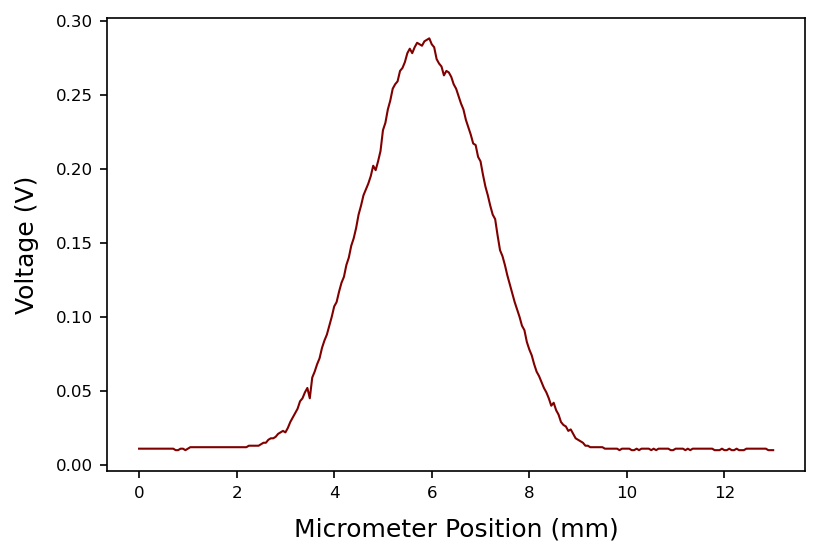

In [7]:
PlotXY(
    x = tables['Laser 1s']['Micrometer Position (mm)'],
    y = tables['Laser 1s']['Voltage (V)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Voltage (V)',
    color = colors['Laser'],
    fileName = 'Laser1s.png'
)

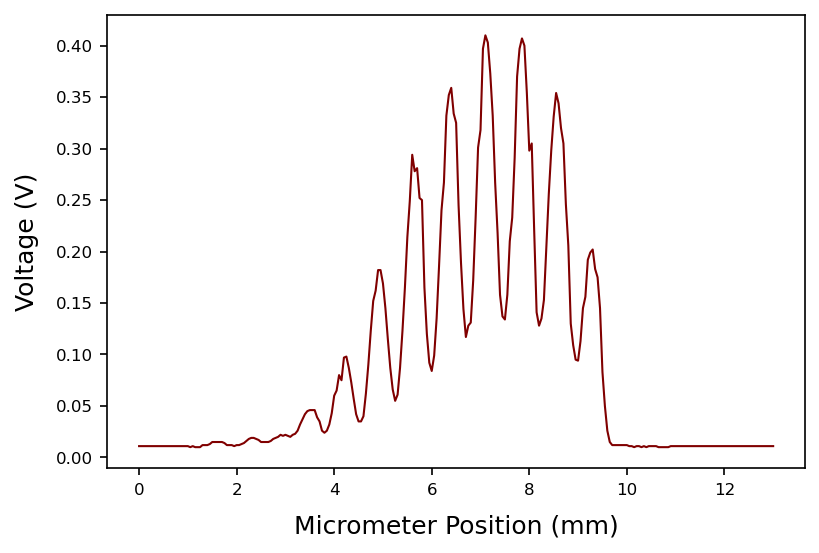

In [8]:
PlotXY(
    x = tables['Laser 2s']['Micrometer Position (mm)'],
    y = tables['Laser 2s']['Voltage (V)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Voltage (V)',
    color = colors['Laser'],
    fileName = 'Laser2s.png'
)

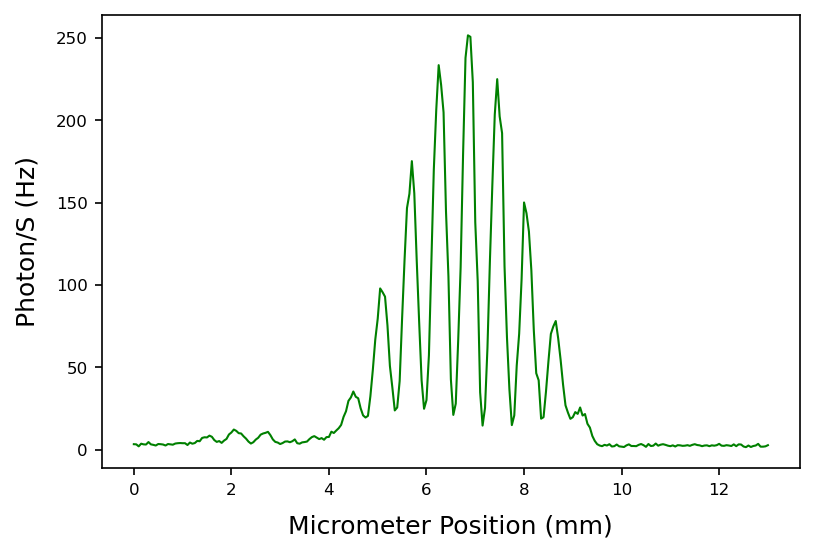

In [10]:
PlotXY(
    x = tables['Bulb 2s t1']['Micrometer Position (mm)'],
    y = tables['Bulb 2s t1']['Photon/S (Hz)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    color = colors['Bulb'],
    fileName = 'Bulb2st1.png'
)

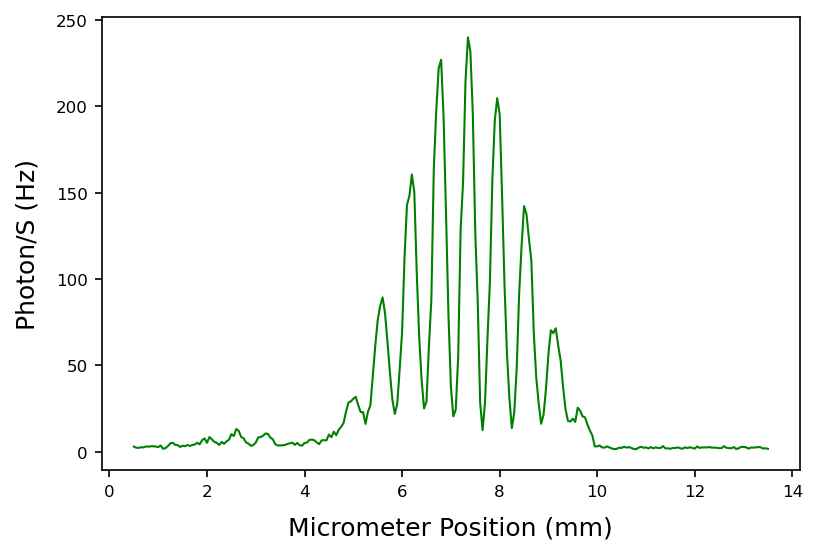

In [11]:
PlotXY(
    x = tables['Bulb 2s t2']['Micrometer Position (mm)'],
    y = tables['Bulb 2s t2']['Photon/S (Hz)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    color = colors['Bulb'],
    fileName = 'Bulb2st2.png'
)

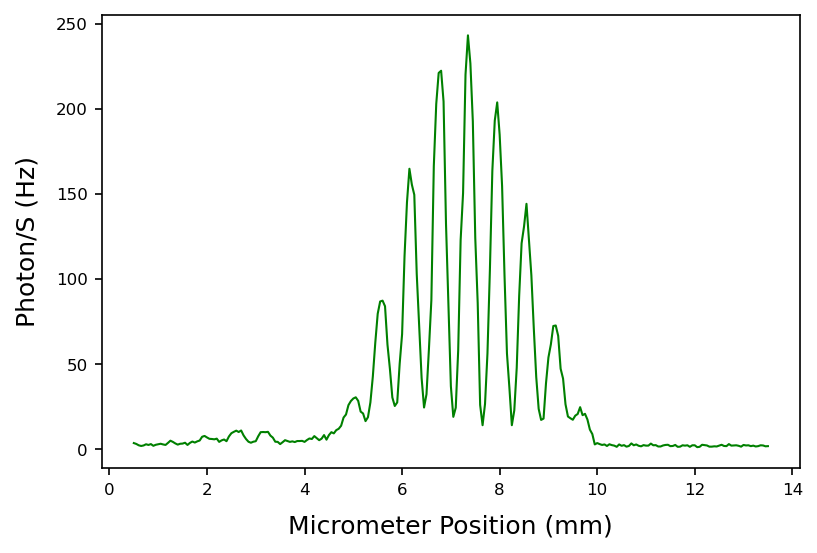

In [12]:
PlotXY(
    x = tables['Bulb 2s t3']['Micrometer Position (mm)'],
    y = tables['Bulb 2s t3']['Photon/S (Hz)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    color = colors['Bulb'],
    fileName = 'Bulb2st3.png'
)

# MultiLinePlots

In [48]:
def PlotMultiXY(
    x: list[np.array],  # x axis data points
    y: list[np.array],  # y axis data points
    xlab: str,          # label on x axis 
    ylab: str,          # label on y axis
    color: list,        # color of the line 
    legend: list,       # lables for xy pair on legend
    fileName: str = ''  # filename to save the figure as
) : 
    """Basic plotting function for x and y data arrays."""
    # formatting 
    myplt.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # data
    for xl,yl,cl,ll in zip(x,y,color,legend) : 
        plt.plot(xl, yl,
                 color=cl, alpha=0.7,
                 linestyle='-', linewidth=1,
                 label=ll)
    plt.legend()
    # finish 
    if(fileName != '') : myplt.Save(path_fig + fileName)
    plt.show()
    plt.close()

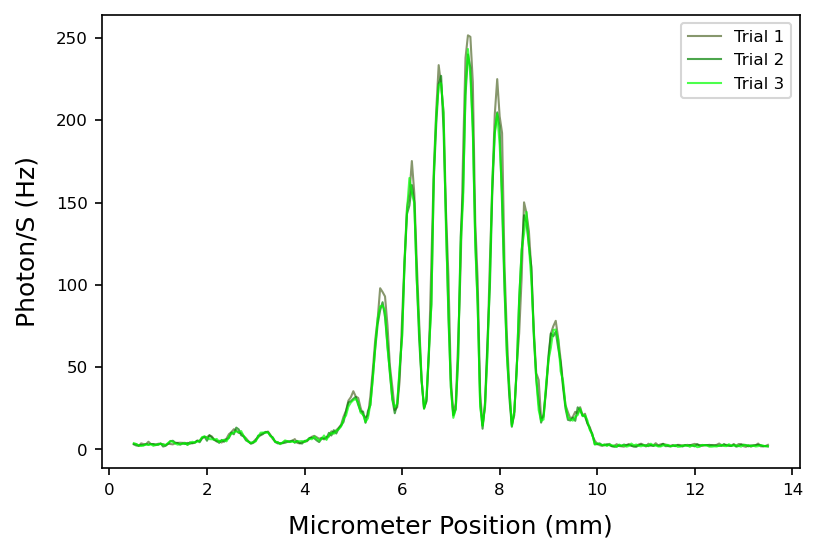

In [50]:
PlotMultiXY(
    x = [
            tables['Bulb 2s t1']['Micrometer Position (mm)']+0.5, # shift right to align with other lines
            tables['Bulb 2s t2']['Micrometer Position (mm)'],
            tables['Bulb 2s t3']['Micrometer Position (mm)']
        ],
    y = [
            tables['Bulb 2s t1']['Photon/S (Hz)'],
            tables['Bulb 2s t2']['Photon/S (Hz)'],
            tables['Bulb 2s t3']['Photon/S (Hz)']
        ],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    color = [
                'darkolivegreen',
                'green',
                'lime'
            ],
    legend = [
        'Trial 1', 'Trial 2', 'Trial 3'
    ],
    fileName = 'Bulb2st123.png'
)

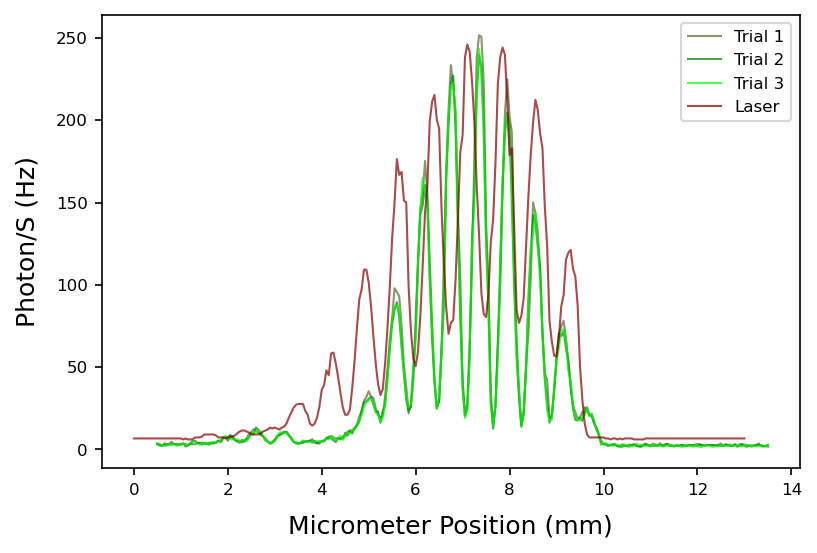

In [52]:
PlotMultiXY(
    x = [
            tables['Bulb 2s t1']['Micrometer Position (mm)']+0.5, # shift right to align with other lines
            tables['Bulb 2s t2']['Micrometer Position (mm)'],
            tables['Bulb 2s t3']['Micrometer Position (mm)'],
            tables['Laser 2s']['Micrometer Position (mm)'],
        ],
    y = [
            tables['Bulb 2s t1']['Photon/S (Hz)'],
            tables['Bulb 2s t2']['Photon/S (Hz)'],
            tables['Bulb 2s t3']['Photon/S (Hz)'],
                        tables['Laser 2s']['Voltage (V)'] * 600
        ],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    color = [
                'darkolivegreen',
                'green',
                'lime',
                colors['Laser'],
            ],
    legend = [
        'Trial 1', 'Trial 2', 'Trial 3', 'Laser'
    ],
    fileName = 'Lasers2_Bulb2st123.png'
)

# Fit Data